<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<h2>Deep Learning en el diagnóstico del Alzheimer</h2> 
<h3>Extracción imágenes de resonancia magnética</h3> 

<b>Juan David Escobar Escobar.</b></br>
* Julio 2022.
* Grupo 14.

## Instalar librerías

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow-directml

In [ ]:
!pip install torch==1.4.0

In [ ]:
!pip install numpy==1.18.1

In [ ]:
!pip install pandas==0.25.3

In [ ]:
!pip install nibabel

In [ ]:
!pip install tqdm==4.42.1

In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python

In [ ]:
!pip install pandasql

In [ ]:
!pip install ipython-sql

In [ ]:
!pip install autopep8

## Importar librerías

In [12]:
import tensorflow
from tensorflow import keras

import matplotlib.pyplot as plt
import nibabel as nib

import os
import cv2
import nibabel as nib
import numpy as np

import pandas as pd
import sqlite3
from sqlite3 import Error
from pandasql import sqldf

## Exploración de datos

In [13]:
"""
1. Lectura de las imágenes en formato .Nifti

2. Imprime el atributo shape que nos dice que se trata de un escaneo 3D 
   (anatómico) # y tiene 256 vóxeles en la primera dimensión, 
   256 vóxeles en la segunda dimensión y 180 vóxeles en la 
   tercera dimensión.  
   
NOTAS: 
a. Las imágenes NIFTI contienen (El encabezado con metadatos,
Los datos de la imagen y La matriz afín). 

b. En el caso de los archivos fMRI, la cuarta dimensión (casi) siempre 
representa la dimensión "tiempo". Por lo tanto, puede suponer que 
una imagen nifti de un archivo fMRI tiene 4 dimensiones, siendo las
tres primeras las dimensiones espaciales 
(similar al archivo anatómico de MRI:) 
y el último (cuarto) siendo la dimensión del tiempo ().
"""

fig = plt.figure()
path = r"C:\Users\Juan David\Documents\TFM\ADNI1_Complete 1Yr 1.5T (1)\ADNI\031_S_0568\MPR-R__GradWarp__N3__Scaled\2006-12-05_12_35_03.0\I65041\ADNI_031_S_0568_MR_MPR-R__GradWarp__N3__Scaled_Br_20070806132107428_S23625_I65041.nii"
#path = r"/Volumes/My Book/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/003_S_0981/MPR__GradWarp__B1_Correction__N3__Scaled/2007-11-05_09_14_22.0/I83316/ADNI_003_S_0981_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20071127105843939_S42293_I83316.nii"
path = 'C:/Users/Juan David/Documents/TFM/TFM/Notebooks/ELT/ADNI_114_S_0378_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20071110120508103_S21540_I81418_noneck (3).nii.gz'
path = 'D:/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/002_S_0954/MPR-R__GradWarp__B1_Correction__N3__Scaled_2/2006-10-10_15_13_04.0/I118688\ADNI_002_S_0954_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001120143792_S19979_I118688_noneck.nii.gz'

epi_img  = nib.load(path)
epi_img_data  = epi_img.get_fdata()
epi_img_hdr = epi_img.header

print(type(epi_img_data), epi_img_data)
print(type(epi_img_data.shape), epi_img_data.shape)
print(type(epi_img_hdr), epi_img_hdr)

<class 'numpy.ndarray'> [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ..

<Figure size 432x288 with 0 Axes>

In [14]:
"""
La razón por la que solo imprime ceros es porque el primer 
y el último par de números en cada dimensión probablemente 
no contienen ningún cerebro (señal relacionada con), 
solo espacio vacío
"""

print(epi_img_data)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [15]:
"""
Es importante recordar que nuestros datos aquí no se pueden 
trazar directamente como una imagen (2D), porque nuestros 
datos (una exploración anatómica) son 3D. Sin embargo, solo
podemos trazar un solo segmento del volumen 3D, por ejemplo,
el segmento central de nuestro primer eje vóxel:
"""

mid_slice_x = epi_img_data[25, :, :]
print(mid_slice_x.shape)

(166, 104)


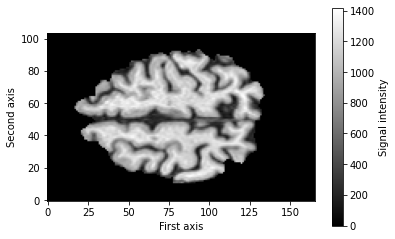

(166, 104)

In [16]:
"""
Podemos usar matplotlib para trazar este corte como una imagen
usando la imshowfunción que viste antes:

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
"""

plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()
mid_slice_x.shape

((104, 166), (104, 131), (166, 131))

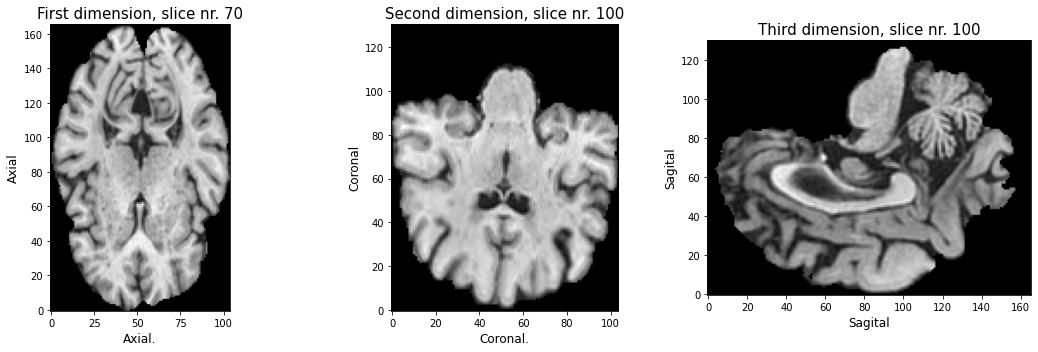

In [17]:
"""
Podemos usar matplotlib para trazar este corte ubicado en el centro 
de la imagene en formato NIFTI y extraer de cada dimensión una imagen
en 2D, la cual brinda mayor información visual de cada corte del cerebro.

(106, 127, 113)
53,63,56

(131, 166, 104)
65, 83, 52
"""

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))


ax[0].imshow(epi_img_data[65, :, :], origin='lower', cmap='gray')
ax[0].set_xlabel('Axial.', fontsize=12)
ax[0].set_ylabel('Axial', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(epi_img_data[:, 83, :], origin='lower', cmap='gray')
ax[1].set_xlabel('Coronal.', fontsize=12)
ax[1].set_ylabel('Coronal', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(epi_img_data[:, :, 52], origin='lower', cmap='gray')
ax[2].set_xlabel('Sagital', fontsize=12)
ax[2].set_ylabel('Sagital', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

epi_img_data[65, :, :].T.shape, epi_img_data[:, 83, :].T.shape, epi_img_data[:, :, 52].T.shape

In [ ]:
path = r"D:\\ADNI - IDA\\ADNI1_Complete 1Yr 1.5T\\ADNI-PRE-PROCESAMIENTO\\ENTRENAMIENTO\\\PRUEBA\\ADNI_141_S_1137_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080520101821090_S49443_I106232_axial.jpg"
img1 = cv2.imread(path)


width = 200
height = 200
dim = (width, height)
 
# resize image
resized = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Extracción, carga y transformación (Pre-procesamiento)

In [8]:
%run ./Helpers/Preprocesamiento_helper.ipynb

In [9]:
"""Esta función guarda las imágenes provenientes del corte coaxial y axial de una imagen NIFTI, en
   una subcarpeta llamada jpg y define un tamaño estándar para cada imagen de 256 x 256 px

Parameters
----------
list : numpy.ndarray
       datos numéricos de una imagen en formato NIFTI (Slide 1 corte (Dimension 1: Axial))
       datos numéricos de una imagen en formato NIFTI (Slide 1 corte (Dimension 2: Coronal))

Ej:
[{
    'list_volumen': [array([[0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           ...,
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           ...,
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.]])], 
      'save_path': 'D:\\ADNI - IDA\\ADNI1_Complete 1Yr 1.5T\\ADNI
                        \\023_S_0058\\MPR__GradWarp__B1_Correction__N3__Scaled
                        \\2005-11-30_09_36_10.0\\I108504\\jpg', 
      'list_file_names': ['DNI_023_S_0058_MR_MPR__GradWarp__B1_Correction__N3__
                          Scaled_Br_20080605143248460_S10335_I108504_coronal', 
                         'DNI_023_S_0058_MR_MPR__GradWarp__B1_Correction__N3__
                         Scaled_Br_20080605143248460_S10335_I108504_axial']
}] 

Returns: 
-------
msg: Éxito o Error al guardar las imágenes en formato JPG
"""

def save_slice_volume_in_jpg(list_slices_save_jpg, count_images:int):
    
    result = {'msg_result':'Éxito', 'except': '' }
    for item in list_slices_save_jpg:
        
        list_volume = item["list_volumen"]
        save_path  = item["save_path"]
        list_file_names = item["list_file_names"]
        
        for index, volume in enumerate(list_volume):
  
            shape = volume.shape             
            file_name = list_file_names[index]    

            # Crear ruta de almacenamiento en caso de que no exista
            if not os.path.exists(save_path):
                os.makedirs(save_path)        
            try:  
                # Transformaciones y pre-procesamiento de imágenes
                
                # 1. Normalización en escala de grises
                volume_norm = normalize_image(volume, count_images)                
                
                # 2. Almacenar imagen jpg normalizada
                new_current_flie = file_name + ".jpg"
                abs_path = os.path.join(save_path, new_current_flie)
                cv2.imwrite(abs_path, volume_norm)
                
                # 3.Resize image
                
                # 3.1 definir dimensiones estándar para cada imagen
                width = 256 # se mantiene el width original 
                height = 256
                dim = (width, height)          
                 
                img = cv2.imread(abs_path)   
                img_resize = resize_img(img, count_images)
                   
                # 4. Reducir artefactos de ruido y suavizar imagen
                img_with_out_noise = reduce_noise(img_resize, count_images)
               
                # 5. Ecualización de contraste 
                #img_eq = equalize_contrast(img_with_out_noise, count_images)
                             
                #TODO: def segment_brain outline(img:np.ndarray, count:int) Funcion para eliminar el contorno del cerebro (cuero cabelludo y hueso)
                
                # 6. Almacenar imagen jpg pre-procesada
                cv2.imwrite(abs_path, img_with_out_noise)                
                
                print('count_img_saved:', count_images)
                print('-'*20)     
                print('volume:', volume.shape, type(volume))
                print('volume_norm:', volume_norm.shape, type(volume_norm))
                print('img_resize:', img_resize.shape, type(img_resize))
                print('img_with_out_noise:', img_with_out_noise.shape, type(img_with_out_noise))
                      
                # Mostrar líneas horizontales y verticales detectadas
                if count_images == 0:
                
                    # 1. Mostrar líneas horizontales detectadas
                    detect_horizontal_lines(img_with_out_noise, count_images)

                    # 2. Mostrar líneas verticales detectadas
                    detect_vertical_lines(img_with_out_noise, count_images)
                                
            except Exception as e:
                
                msg_result = 'Error guardando la imagen ' + abs_path + ','
                len_msg = len(msg_result)
                msg_result = msg_result[0: len_msg -1] # Eliminamos la última coma
                result['msg_result'] = msg_result
                result['except'] = str(e)                

        return result

## Lectura y conversión de archivos en formato NIFTI a JPG

In [10]:
""" Registrar log de cada imagen jpg almacenadaI45108.nii   

Parameters
----------
df_pd_log          : pandas.dataframe
list_file_names    : list
current_folder_nii : str
current_file_nii   : str
file               : str
fil_jpg            : str
state              : str

Retorno
----------
df_pd_log          : pandas.dataframe
"""

def registra_log_jpg(df_pd_log, list_file_names, current_folder_nii, current_file_nii, file, save_path, state, msg, current_date):
    
    list_current_folder_nii = current_folder_nii.split("\\")                   
    image_data_id = list_current_folder_nii[7]
    subject = list_current_folder_nii[4]
    path_nii = current_file_nii
    file_name_nii = file
    path_jpg = save_path
    
    for fil_jpg in list_file_names:            
        
        file_name_jpg = fil_jpg # "_coronal", "_axial"               
 
        current_row = {\
                         'image_data_id': image_data_id,\
                         'subject': subject,\
                         'path_nii': path_nii,\
                         'file_name_nii': file_name_nii,\
                         'path_jpg': path_jpg,\
                         'file_name_jpg': file_name_jpg,\
                         'state': state,\
                         'msg': msg,\
                         'creation_date': current_date\
                       }\
    
        df_pd_log = df_pd_log.append(current_row, ignore_index = True)      
        
    return df_pd_log

In [ ]:
root = 'D:/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/002_S_0954/MPR-R__GradWarp__B1_Correction__N3__Scaled_2/2006-10-10_15_13_04.0/I118688/'
file = 'ADNI_002_S_0954_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001120143792_S19979_I118688_noneck.nii.gz'
sub_folder_new_format = "/jpg_no_neck/"

list_volumen    = []
save_path  = ''
list_file_names = []

current_file_nii = os.path.join(root, file)  # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008\ADNI_023_S_0058_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061130142201343_S15796_I31008.nii     
current_folder_nii = os.path.join(root)      # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008               
current_folder_new_jpg = current_folder_nii + sub_folder_new_format                                
current_file = file[0: len(file) - 7]

# 1. Leer imagen iterada
mri  = nib.load(current_file_nii)
mri_data = mri.get_fdata()
shape = mri_data.shape            

# 2. Obtener los valores de las 3D de la imagen .nii
n_i, n_j, n_k = mri_data.shape

# 3. Obtener el eje central de cada dimensión
center_i = (n_i - 1) // 2  # // división entera
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2

# 4. Obtener cortes de cada dimensión ubicados en el centro de cada dimensión
#             slice_coronal_0 = mri_data[center_i, :, :] # Coronal
#             slice_axial_1 = mri_data[:, center_j, :] # Axial
#             slice_sagital_2 = mri_data[:, :, center_k] # Sagital

slice_axial_0 = mri_data[center_i, :, :] # Axial
slice_corona_1 = mri_data[:, center_j, :] # Coronal
slice_sagital_2 = mri_data[:, :, center_k] # Sagital


fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].imshow(slice_axial_0, origin='lower', cmap='gray')
ax[0].set_xlabel('Axial.', fontsize=12)
ax[0].set_ylabel('Axial', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(slice_corona_1, origin='lower', cmap='gray')
ax[1].set_xlabel('Coronal.', fontsize=12)
ax[1].set_ylabel('Coronal', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(epi_img_data[:, :, center_k], origin='lower', cmap='gray')
ax[2].set_xlabel('Sagital', fontsize=12)
ax[2].set_ylabel('Sagital', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

# 5. Almacenar volúmenes a guardar en formato jpg           
list_volumen.append(slice_corona_1)
list_volumen.append(slice_axial_0)

# 6. Almacenar ruta donde se va a almacenar la imagen jpg
save_path = current_folder_new_jpg

# # 7. Almacenar nombre del archivo = nombre original + _coronal o _axial
current_file_coronal = current_file + "_coronal"
current_file_axial = current_file + "_axial"                  
list_file_names.append(current_file_coronal)
list_file_names.append(current_file_axial) 

# # 8. Almacenar en objeto tipo diccionario 
list_slices_save_jpg = []
current_dic = {}

current_dic["list_volumen"] = list_volumen
current_dic["save_path"] = save_path
current_dic["list_file_names"] = list_file_names

list_slices_save_jpg.append(current_dic)            

result = {'msg_result':'Exito', 'except': '' }
for item in list_slices_save_jpg:

    list_volume = item["list_volumen"]
    save_path  = item["save_path"]
    list_file_names = item["list_file_names"]

    for index, volume in enumerate(list_volume):

        shape = volume.shape             
        file_name = list_file_names[index]    

        # Crear ruta de almacenamiento en caso de que no exista
        if not os.path.exists(save_path):
            os.makedirs(save_path)        
        try:  
            # Transformaciones y pre-procesamiento de imágenes

            # 1. Normalización en escala de grises
            volume_norm = normalize_image(volume, count_images)                

            # 2. Almacenar imagen jpg normalizada
            new_current_flie = file_name + ".jpg"
            abs_path = os.path.join(save_path, new_current_flie)
            cv2.imwrite(abs_path, volume_norm)
            print(volume_norm.shape)

            # 3. Resize image

            # 3.1 definir dimensiones estándar para cada imagen
            width = 256 # se mantiene el width original 
            height = 256
            dim = (width, height)    
            print(abs_path)

            img = cv2.imread(abs_path)   
            img_resize = resize_img(img, count_images)

            # 4. Reducir artefactos de ruido y suavizar imagen
            img_with_out_noise = reduce_noise(img_resize, count_images)

            # 5. Ecualización de contraste 
            #img_eq = equalize_contrast(img_with_out_noise, count_images)

            #TODO: def segment_brain outline(img:np.ndarray, count:int) Función para eliminar el contorno del cerebro (cuero cabelludo y hueso)

            # 6. Almacenar imagen jpg pre-procesada
            cv2.imwrite(abs_path, img_with_out_noise)                

            print('count_img_saved:', count_images)
            print('-'*20)     
            print('volume:', volume.shape, type(volume))
            print('volume_norm:', volume_norm.shape, type(volume_norm))
            print('img_resize:', img_resize.shape, type(img_resize))
            print('img_with_out_noise:', img_with_out_noise.shape, type(img_with_out_noise))

            # Mostrar líneas horizontales y verticales detectadas
            if count_images == 0:

                # 1. Mostrar líneas horizontales detectadas
                detect_horizontal_lines(img_with_out_noise, count_images)

                # 2. Mostrar líneas verticales detectadas
                detect_vertical_lines(img_with_out_noise, count_images)

        except Exception as e:

            msg_result = 'Error guardando la imagen ' + abs_path + ','
            len_msg = len(msg_result)
            msg_result = msg_result[0: len_msg -1] # Eliminamos la ultima coma
            result['msg_result'] = msg_result
            result['except'] = str(e)    

Generando imagenes 2D..
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 0
--------------------
volume: (126, 113) <class 'numpy.ndarray'>
volume_norm: (126, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
Original Dimensions :  (256, 256)
Original Dimensions :  (256, 256)
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 0
--------------------
volume: (94, 130) <class 'numpy.ndarray'>
volume_norm: (94, 130) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2293
--------------------
volume: (146, 130) <class 'numpy.ndarray'>
volume_norm: (146, 130) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2294
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
Fin del ciclo de almacen

,image_data_id,subject,path_nii,file_name_nii,path_jpg,file_name_jpg,state,msg,creation_date
0,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
1,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
2,I40966,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
3,I40966,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
4,I64025,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
...,...,...,...,...,...,...,...,...,...
4583,I97341,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR-R__GradWarp__B1_Correct...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR-R__GradWarp__B1_Correct...,Exito,Exito,2022-06-19 12:10:40
4584,I97327,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
4585,I97327,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
4586,I112538,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40


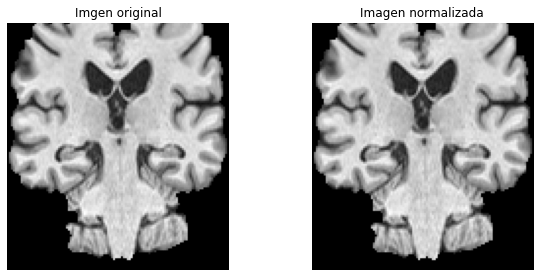

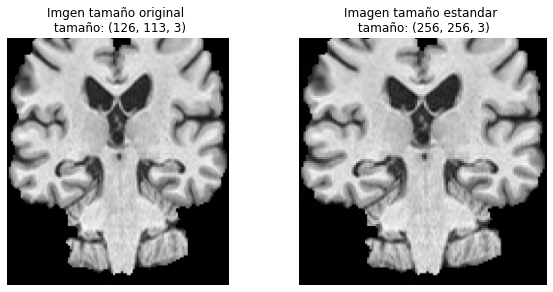

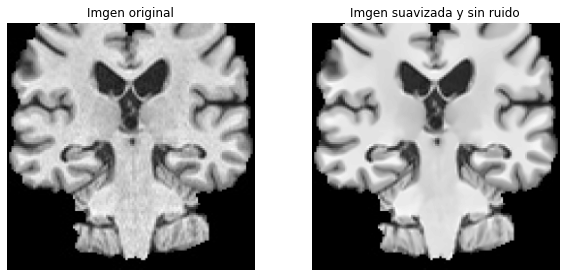

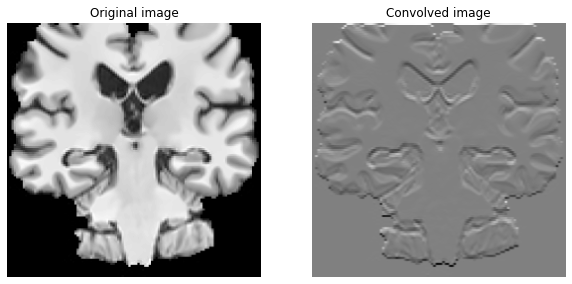

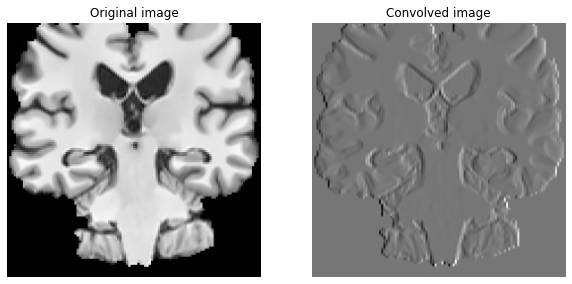

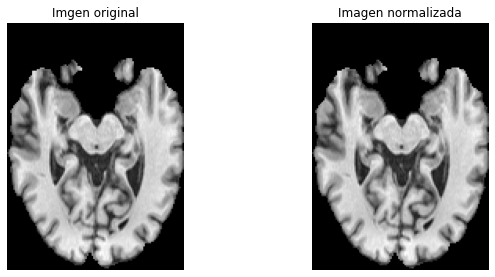

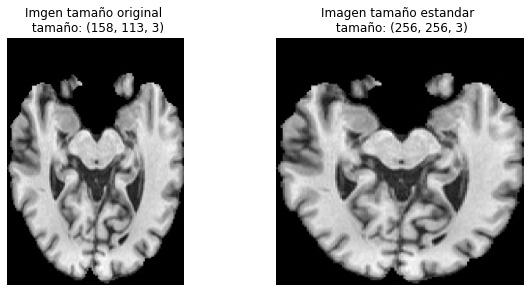

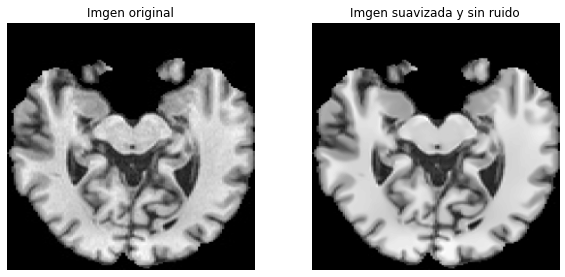

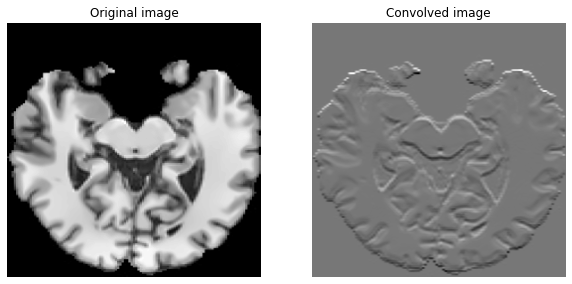

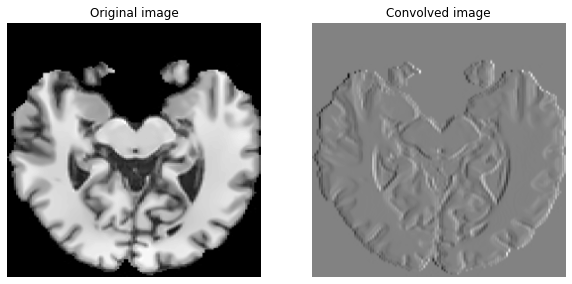

In [99]:
"""
1. Extracción de imágenes NIFTI (.nii) de estructura jerárquica de carpetas donde se almacenan, como 
   la del ejemplo a continuación:
   
   a. Raiz => D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI
      b. Sub folder 1 => 002_S_0295 
         c. Sub folder 2 => MPR__GradWarp__B1_Correction__N3__Scaled 
            d. Sub folder 3 => 2006-04-18_08_20_30.0 
               e. Sub folder => I45108 
                    File => ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii
                  
2. Lectura de las imágenes en formato Nifti, en 3D donde cada dimensión contiene una secuencia de 
   imágenes para los cortes de las imágenes de resonancia magnética cerebral (Dimensión 1: Axial, Dimensión 2: Coronal
   y Dimesión 3:Sagital).
   
3. Crear Sub-folder en el nivel "g" al interior del nivel "e" llamado "jpg" en el cual se almacenaran los cortes 
   Axial y Coronal del cerebro, ya que son las imágenes que proveen más información para la detección del Alzheimer,
  para ambos cortes se seleccionará  la imagen que se ubica en el centro de cada dimensión de la imagen 3D en formato Nifti,
  ya que son las que permiten ver cada corte de manera completa.
  
4. Registra una tabla de log con la información de las imágenes almacenadas. 
"""
import os
import pandas as pd
import pytz
from datetime import datetime

# Dataframe para registro de log de auditoria
df_pd_log = pd.DataFrame()
df_pd_log = pd.DataFrame(columns=['image_data_id',\
                                  'subject',\
                                  'path_nii',\
                                  'file_name_nii',\
                                  'path_jpg',\
                                  'file_name_jpg',\
                                  'state',\
                                  'msg',\
                                  'creation_date'\
                                 ])

# Variables de directorios
path_root = r'D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI'



sub_folder_new_format = "\jpg_no_neck"
count_dirs = 0

# Variables de tiempo
zone = pytz.timezone('America/Bogota')
date = datetime.now(zone)
current_date = date.strftime("%d/%m/%Y %H:%M:%S")
current_date = datetime.strptime(current_date, "%d/%m/%Y %H:%M:%S")
current_date_log_file = str(date.day).zfill(2) + str(date.month).zfill(2) + str(date.year) + "_" + str(date.hour) + "_" + str(date.minute)+ "_" + str(date.second)

count_images = 0
print('Generando imagenes 2D..')
for root, dirs, files in os.walk(path_root):   
    
    dirs.sort() # ordenar subdirectorios ascendente      
   
    for file in files:
        
        if file.endswith("_noneck.nii.gz"):
                                   
            list_volumen    = []
            save_path  = ''
            list_file_names = []
                               
            current_file_nii = os.path.join(root, file)  # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008\ADNI_023_S_0058_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061130142201343_S15796_I31008.nii     
            current_folder_nii = os.path.join(root)      # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008               
            current_folder_new_jpg = current_folder_nii + sub_folder_new_format                                
            current_file = file[0: len(file) - 7]
                                
            # 1. Leer imagen iterada
            mri  = nib.load(current_file_nii)
            mri_data = mri.get_fdata()
            shape = mri_data.shape            
            
            # 2. Obtener los valores de las 3D de la imagen .nii
            n_i, n_j, n_k = mri_data.shape

            # 3. Obtener el ejecentral de cada dimensión
            center_i = (n_i - 1) // 2  # // division entera
            center_j = (n_j - 1) // 2
            center_k = (n_k - 1) // 2

            # 4. Obtener cortes de cada dimensión ubicados en el centro de cada dimensión
#             slice_coronal_0 = mri_data[center_i, :, :] # Coronal
#             slice_axial_1 = mri_data[:, center_j, :] # Axial
#             slice_sagital_2 = mri_data[:, :, center_k] # Sagital
            
            slice_axial_0 = mri_data[center_i, :, :] # Axial
            slice_corona_1 = mri_data[:, center_j, :] # Coronal
            slice_sagital_2 = mri_data[:, :, center_k] # Sagital
            
            # 5. Almacenar volúmenes a guardar en formato jpg           
            list_volumen.append(slice_corona_1)
            list_volumen.append(slice_axial_0)
                                 
            # 6. Almacenar ruta donde se va a almacenar la imagen jpg
            save_path = current_folder_new_jpg
            
            # 7. Almacenar nombre del archivo = nombre original + _coronal o _axial
            current_file_coronal = current_file + "_coronal"
            current_file_axial = current_file + "_axial"                  
            list_file_names.append(current_file_coronal)
            list_file_names.append(current_file_axial) 
                 
            # 8. Almacenar en objeto tipo diccionario 
            list_slices_save_jpg = []
            current_dic = {}
            
            current_dic["list_volumen"] = list_volumen
            current_dic["save_path"] = save_path
            current_dic["list_file_names"] = list_file_names
                                      
            list_slices_save_jpg.append(current_dic)            
            # print(list_slices_save_jpg, "\n")
            
            # 9. Almacenar cortes en formato .jpg en sub folder contenedor de la imagen .nii
            result = save_slice_volume_in_jpg(list_slices_save_jpg, count_images)
            count_images = count_images + 1
            print(count_images)
                                                    
            # 10. Actualizar estado
            print(type(result), result)
            if result['msg_result'] == "Exito":
                #print(msg_result, "\n",  list_file_names)
                state = "Exito"               
            else:
                state = "Error"              
                print(result['msg_result'])
                print('-'*20)
                print(result['except'])
                
            # 11. Registrar log de auditoría de las imágenes almacenadas en jpg   
            df_pd_log = registra_log_jpg(df_pd_log,
                                         list_file_names,
                                         current_folder_nii,
                                         current_file_nii,
                                         file,
                                         save_path,                            
                                         state,
                                         result['msg_result'],
                                         current_date)    
     
print("Fin del ciclo de almacenamiento")

# return df_pd_log
path_log_root = r"D:\ADNI - IDA\A_Metadatos\log"
file_name_ext_load = r"\dl_alzheimer_log_extraction_nii_to_jpg_" + current_date_log_file + ".csv"
path_log_ext_load = path_log_root + file_name_ext_load
print(path_log_ext_load)

df_pd_log.to_csv (path_log_ext_load, index = None, header=True)
display(df_pd_log)

## Crear tabla de metadatos

In [101]:
def crear_tbl_metadatos_consolidado():
    
    #D:\ADNI - IDA\A_Metadatos\log\dl_alzheimer_log_extraction_nii_to_jpg_18062022_20_6_38.csv
    file_demografico_metadatos = r"D:/ADNI - IDA/A_Metadatos/ADNI1_Complete_1Yr_1.5T_4_27_2022.csv"
    #file_demografico_metadatos = r"/Volumes/My Book/ADNI - IDA/A_Metadatos/ADNI1_Complete_1Yr_1.5T_4_27_2022.csv"
    df_demografico_metadatos = pd.read_csv(file_demografico_metadatos)
    df_demografico_metadatos.columns= df_demografico_metadatos.columns.str.lower()
    df_demografico_metadatos =  df_demografico_metadatos.rename(columns={"image data id": "image_data_id_m", "acq date_m": "acq_date", "subject": "subject_m", "group": "group_m"})

    #file_name_ext_load = r"D:/ADNI - IDA/A_Metadatos/log/dl_alzheimer_log_extraction_nii_to_jpg_05052022_12_32_2.csv"
    #file_name_ext_load = r"/Volumes/My Book/ADNI - IDA/A_Metadatos/log/dl_alzheimer_log_extraction_nii_to_jpg_05052022_12_32_2.csv"    
    df_log = pd.read_csv(path_log_ext_load)        

    df_metadatos_con = df_log.merge(df_demografico_metadatos,  how='inner',
                                    left_on=['image_data_id','subject'],
                                    right_on = ['image_data_id_m','subject_m'])

    df_metadatos_con['orden'] = np.arange(0, len(df_metadatos_con))

    df_metadatos_con.drop(['image_data_id_m', 'subject_m'], axis = 1, inplace = True) 

    return df_metadatos_con

In [102]:
print(path_log_ext_load)

D:\ADNI - IDA\A_Metadatos\log\dl_alzheimer_log_extraction_nii_to_jpg_19062022_12_10_40.csv


In [103]:
df_metadatos_con = crear_tbl_metadatos_consolidado()
df_metadatos_con.shape
df_metadatos_con.columns
df_metadatos_con.to_csv(r"D:/ADNI - IDA/A_Metadatos/log/log_metadatos_consolidado.csv")
           

In [104]:
df_metadatos_con.tail(3)

,image_data_id,subject,path_nii,file_name_nii,path_jpg,file_name_jpg,state,msg,creation_date,group_m,sex,age,visit,modality,description,type,acq date,format,downloaded,orden
4585,I97327,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,NaN,4585
4586,I112538,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN,4586
4587,I112538,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN,4587


In [105]:
df_metadatos_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588 entries, 0 to 4587
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_data_id  4588 non-null   object
 1   subject        4588 non-null   object
 2   path_nii       4588 non-null   object
 3   file_name_nii  4588 non-null   object
 4   path_jpg       4588 non-null   object
 5   file_name_jpg  4588 non-null   object
 6   state          4588 non-null   object
 7   msg            4588 non-null   object
 8   creation_date  4588 non-null   object
 9   group_m        4588 non-null   object
 10  sex            4588 non-null   object
 11  age            4588 non-null   int64 
 12  visit          4588 non-null   int64 
 13  modality       4588 non-null   object
 14  description    4588 non-null   object
 15  type           4588 non-null   object
 16  acq date       4588 non-null   object
 17  format         4588 non-null   object
 18  downloaded     8 non-null   

## Registrar tabla de log en BD

In [106]:
%run ./Helpers/sqllite_helper.ipynb
helper_sqllite()

helper sqllite loaded..


In [107]:
"""Registrar log de carga"""

database = r"C:\sqllite\alzheimer_db.db"
conn = create_connection(database)

drop_table(conn, "DROP TABLE log_metadatos_consolidado")
df_metadatos_con.to_sql("log_metadatos_consolidado", con = conn)

In [108]:
query = "SELECT * FROM log_metadatos_consolidado LIMIT 3"
df_rs_query = query_table(conn, query)
df_rs_query

,index,image_data_id,subject,path_nii,file_name_nii,path_jpg,file_name_jpg,state,msg,creation_date,...,sex,age,visit,modality,description,type,acq date,format,downloaded,orden
0,0,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,...,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,4/18/2006,NiFTI,None,0
1,1,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,...,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,4/18/2006,NiFTI,None,1
2,2,I40966,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,...,M,85,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,11/02/2006,NiFTI,None,2


## Exploración de datos

In [109]:
"""Datos agrupados por rango de edades """

df_metadatos_con['rangos_edad'] = np.select(
[
    ((df_metadatos_con['age'] >= 55) & (df_metadatos_con['age'] < 67)),
    ((df_metadatos_con['age'] >= 67) & (df_metadatos_con['age'] < 79)),
    ((df_metadatos_con['age'] >= 79) & (df_metadatos_con['age'] <= 91))
    
], 
[
   "[55-67]",
   "[67-79]",
   "[79-91]"
], 
default='[]')

In [110]:

df_metadatos_con.rangos_edad.unique()

array(['[79-91]', '[67-79]', '[55-67]'], dtype=object)

In [111]:
"""Datos agrupados por rango de edades """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT rangos_edad as clasificacion,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by rangos_edad \
        order by rangos_edad "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,clasificacion,cantidad
0,[55-67],464
1,[67-79],2570
2,[79-91],1554


In [112]:
"""Datos agrupados por evolución de la enfermedad de Alzheimer """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT group_m as clasificacion,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by group_m \
        order by group_m "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,clasificacion,cantidad
0,AD,952
1,CN,1410
2,MCI,2226


In [113]:
"""Datos agrupados por evolución de la enfermedad de Alzheimer y Sexo """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT group_m as clasificacion,\
                sex as sexo,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by group_m,sex \
        order by group_m "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,clasificacion,sexo,cantidad
0,AD,F,442
1,AD,M,510
2,CN,F,670
3,CN,M,740
4,MCI,F,794
5,MCI,M,1432


In [114]:
"""Datos agrupados por Sexo """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT sex as sexo,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by sex \
        order by sex "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,sexo,cantidad
0,F,1906
1,M,2682


### Fuente de datos

Datos tomados desde https://adni.loni.usc.edu/about/
Estos datos fueron tomados con propósito investigativo y aporte científico para la comunidad de Neuro radiología.

# Referencias bibliográficas

<a name="cite-PER-GRA:2022"/><sup>[^](#ref-2) </sup>Wilde, D. (2020, julio 22). _Deep Learning for Alzheimer’s Classification_. [URL](https://levelup.gitconnected.com/deep-learning-for-alzheimers-classification-57611161e442)
    
<a name="cite-PER-GRA:2021"/><sup>[^](#ref-2) </sup>Snoek, L. (2021). _Working with MRI data in Python_. [URL]( https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Segura Anaya, M., Kanaan Izquierdo, S., & Ventura Royo, C. (2018, junio 5). _Cálculo de dimensiones de regiones de interés del cerebro en resonancias magnéticas_. [URL](http://openaccess.uoc.edu/webapps/o2/bitstream/10609/81588/6/seganamiTFM0618memoria.pdf)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Markiewicz, C. (2006-2022). _Access a cacophony of neuro-imaging file formats_. [URL](https://nipy.org/nibabel/tutorials.html#tutorials)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Quiroga, F. (2018). _Procesamiento de imágenes con Python y Numpy_. [URL](https://facundoq.github.io/courses/aa2018/res/04_imagenes_numpy.html)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Joseph, M., Jeyachandra, J., & Dickie, E. (2022, junio 07). _Introduction to Working with MRI Data in Python_. [URL](https://carpentries-incubator.github.io/SDC-BIDS-IntroMRI/anatomy-of-nifti/index.html)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Chang, L. (2021). _Modeling Single Subject Data_. [URL](https://dartbrains.org/content/GLM_Single_Subject_Model.html)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Herholz, P. (2021). _Using Python for neuroimaging data - NiBabel_. [URL](https://peerherholz.github.io/workshop_weizmann/data/image_manipulation_nibabel.html)

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>Achilleas. (2022). _Python nibabel.save() Examples_. [URL](https://www.programcreek.com/python/example/98178/nibabel.save)
